<a href="https://colab.research.google.com/github/hiiragi-kaede/chainer_practice/blob/master/Chainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def f(a):
  a=[6,7,8]
  print(id(a))

def g(a):
  a.append(1)

def func():
  a0=[1,2,3]
  print(id(a0))
  f(a0)
  
  print(a0)

  a1=[1,2,3]
  g(a1)
  print(a1)

func()

139656822769288
139656822786632
[1, 2, 3]
[1, 2, 3, 1]


In [0]:
class DataManager:
  def __init__(self,x,y,z):
    self.x=x
    self.y=y
    self.z=z
  
  def add_x(self,delta):
    self.x+=delta
  
  def add_y(self,delta):
    self.y+=delta
  
  def add_z(self,delta):
    self.z+=delta
  
  def sum(self):
    return self.x+self.y+self.z

data=DataManager(2,3,5)
print(data.sum())
data.add_x(4)
print(data.sum())
data.add_y(0)
print(data.sum())
data.add_z(-9)
print(data.sum())
print('{},{},{}'.format(data.x,data.y,data.z))

10
14
14
5
6,3,-4


In [0]:
num=[x for x in range(2,101)]
isprime=[True for x in range(2,101)]
for i in range(2,11):
  id=i
  while id<=100-i:
    id+=i
    isprime[id-2]=False
  
res=[x for x in num if isprime[x-2]]
print(res)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

dataset=load_boston()
x=dataset.data
t=dataset.target
pipeline=Pipeline([
  ('scaler',PowerTransformer()),
  ('reg',LinearRegression())
])
x_train,x_test,t_train,t_test=train_test_split(x,t,test_size=0.3,random_state=0)

pipeline.fit(x_train,t_train)
pipeline.score(x_train,t_train)
linear_result=pipeline.score(x_test,t_test)
print(linear_result)

0.7002856551689581


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [0]:
import numpy as np
import cupy as cp
import time
import tabulate

def get_w_np(x,t):
  xx=np.dot(x.T,x)
  xx_inv=np.linalg.inv(xx)
  xt=np.dot(x.T,t)
  w=np.dot(xx_inv,xt)
  return w

def get_w_cp(x,t):
  xx=cp.dot(x.T,x)
  xx_inv=cp.linalg.inv(xx)
  xt=cp.dot(x.T,t)
  w=cp.dot(xx_inv,xt)
  return w

times_cpu=[]
for N in [10,100,1000,10000]:
  np.random.seed(0)
  x=np.random.rand(N,N)
  t=np.random.rand(N,1)

  t_start=time.time()

  w=get_w_np(x,t)

  t_end=time.time()
  elapsed_time=t_end-t_start
  print('N={:>5}:{:>8.5f} sec'.format(N,elapsed_time))
  times_cpu.append(elapsed_time)

times_gpu=[]
for N in [10,100,1000,10000]:
  cp.random.seed(0)
  x=cp.random.rand(N,N)
  t=cp.random.rand(N,1)

  cp.cuda.Stream.null.synchronize()
  t_start=time.time()

  w=get_w_cp(x,t)

  cp.cuda.Stream.null.synchronize()
  t_end=time.time()
  elapsed_time=t_end-t_start
  print('N={:>5}:{:>8.5f} sec'.format(N,elapsed_time))
  times_gpu.append(elapsed_time)

N=[10,100,1000,10000]
times_cpu=np.asarray(times_cpu)
times_gpu=np.asarray(times_gpu)
ratio=['{:.2f} x'.format(r) for r in times_cpu/times_gpu]

table=tabulate.tabulate(
    zip(N,times_cpu,times_gpu,ratio),
    headers=['N','Numpyでの実行時間(sec)','Cupyでの実行時間(sec)','高速化倍率']
)
print(table)

N=   10: 0.00033 sec
N=  100: 0.00075 sec
N= 1000: 0.12585 sec
N=10000:90.99724 sec
N=   10: 0.00056 sec
N=  100: 0.00090 sec
N= 1000: 0.01531 sec
N=10000: 1.34605 sec
    N    Numpyでの実行時間(sec)    Cupyでの実行時間(sec)  高速化倍率
-----  ------------------------  -----------------------  ------------
   10               0.000325918              0.000562906  0.58 x
  100               0.000751019              0.000895023  0.84 x
 1000               0.125846                 0.0153127    8.22 x
10000              90.9972                   1.34605      67.60 x


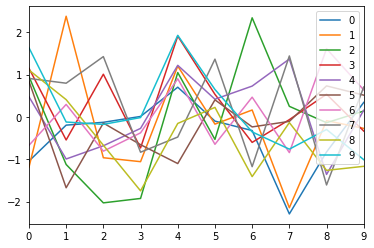

In [0]:
import pandas as pd
df=pd.read_csv('sample_data/california_housing_train.csv')
#df['target']=None
'''
mask1=df['median_house_value']<60000
mask2=(df['median_house_value'] >=60000) & (df['median_house_value'] < 70000)
mask3=(df['median_house_value'] >=70000) & (df['median_house_value'] < 80000)
mask4=df['median_house_value'] >= 80000

df.loc[mask1,'target']=0
df.loc[mask2,'target']=1
df.loc[mask3,'target']=2
df.loc[mask4,'target']=3
df.head()

df.iloc[0,0]=None
df.head()
mean=df.mean()
df_fillna=df.fillna(mean)
df_fillna.head()
'''
df=pd.DataFrame(
    data=np.random.randn(10,10)
)
df.plot()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('sample_data/california_housing_train.csv')
df.head()
#plt.scatter(df['population'],df['median_house_value'])
#plt.hist(df['median_house_value'],bins=50)
#plt.boxplot((df['total_bedrooms'],df['population']))

#sns.distplot(df['population'])
#sns.pairplot(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
import numpy as np

x=np.array([2,3,1])
t=np.array([20])
#first layer
w1=np.array([[3,1,2],[-2,-3,-1]])
b1=np.array([0,0])
#second layer
w2=np.array([[3,2]])
b2=np.array([0])

u1=w1.dot(x)+b1
h1=1./(1+np.exp(-u1))
y=w2.dot(h1)+b2

dLdy=-2*(t-y)
dydw2=h1
dydh1=w2
dh1du1=h1*(1-h1)
du1dw1=x
dLdu1=dLdy*dydh1*dh1du1

du1dw1=du1dw1[None]

dLdw1=dLdu1.T.dot(du1dw1)
dLdw2=dLdy*dydw2

print('dLdw1:',dLdw1)
print('dLdw2:',dLdw2)

dLdw1: [[-3.40704286e-03 -5.11056429e-03 -1.70352143e-03]
 [-1.13088040e-04 -1.69632060e-04 -5.65440200e-05]]
dLdw2: [-3.39995290e+01 -2.82720335e-05]


In [0]:
import chainer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import chainer.links as L
import chainer.functions as F
from chainer import Sequential
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#データを読み込み、chainerに合う型に変換
x,t=load_iris(return_X_y=True)
x=x.astype('float32')
t=t.astype('int32')

#テストデータとそれ以外で分割
x_train_val,x_test,t_train_val,t_test = train_test_split(x,t,test_size=0.3,random_state=0)
#上の残りを訓練用と検証用に分割
x_train,x_val,t_train,t_val=train_test_split(x_train_val,t_train_val,test_size=0.3,random_state=0)

l=L.Linear(3,2)
n_input=4
n_hidden=10
n_output=3

net=Sequential(
    L.Linear(n_input,n_hidden),F.relu,
    L.Linear(n_hidden,n_hidden),F.relu,
    L.Linear(n_hidden,n_output)
)

optimizer=chainer.optimizers.SGD(lr=0.01)
optimizer.setup(net)

n_epoch=30
n_batchsize=16

iteration=0

results_train={
    'loss':[],
    'accuracy':[]
}
results_valid={
    'loss':[],
    'accuracy':[]
}

for epoch in range(n_epoch):
  #データセットを並び替えた順番を取得
  order=np.random.permutation(range(len(x_train)))

  #各バッチごとの目的関数の出力と分類精度の保存用リスト
  loss_list=[]
  accuracy_list=[]

  for i in range(0,len(order),n_batchsize):
    #バッチを準備
    index=order[i:i+n_batchsize]
    x_train_batch=x_train[index,:]
    t_train_batch=t_train[index]

    #予測値をNNから出力
    y_train_batch=net(x_train_batch)

    #目的関数の出力から分類精度を計算する
    loss_train_batch=F.softmax_cross_entropy(y_train_batch,t_train_batch)
    accuracy_train_batch=F.accuracy(y_train_batch,t_train_batch)

    loss_list.append(loss_train_batch.array)
    accuracy_list.append(accuracy_train_batch.array)

    #勾配のリセットと勾配の計算
    net.cleargrads()
    loss_train_batch.backward()

    #パラメータの更新
    optimizer.update()

    #カウントアップ
    iteration+=1

  #訓練データに対する目的関数の出力と分類精度を集計
  loss_train=np.mean(loss_list)
  accuracy_train=np.mean(accuracy_list)

  #１エポック終えたら、検証データで評価
  #検証データで予測値を出力
  with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
    y_val=net(x_val)

  #目的関数の出力から分類精度を計算する
  loss_val=F.softmax_cross_entropy(y_val,t_val)
  accuracy_val=F.accuracy(y_val,t_val)

  #結果の表示
  #print('epoch: {},iteration: {}, loss(train): {:.4f}, loss(valid): {:.4f}'.format(
    #epoch,iteration,loss_train,loss_val.array))

  #ログを保存
  results_train['loss'].append(loss_train)
  results_train['accuracy'].append(accuracy_train)
  results_valid['loss'].append(loss_val.array)
  results_valid['accuracy'].append(accuracy_val.array)
'''
#目的関数の出力
plt.plot(results_train['loss'],label='train')
plt.plot(results_valid['loss'],label='valid')
plt.legend()
print("cost func")
plt.show()
#分類精度の出力
plt.plot(results_train['accuracy'],label='train')
plt.plot(results_valid['accuracy'],label='valid')
plt.legend()
print("\naccuracy")
plt.show()
'''

with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
  y_test=net(x_test)

accuracy_test=F.accuracy(y_test,t_test)
#print(accuracy_test.array)

chainer.serializers.save_npz("my_iris.net",net)

In [0]:
import chainer
from chainer import Sequential
import chainer.links as L
import chainer.functions as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

n_input=4
n_hidden=10
n_output=3

#データを読み込み、chainerに合う型に変換
x,t=load_iris(return_X_y=True)
x=x.astype('float32')
t=t.astype('int32')

#テストデータとそれ以外で分割
x_train_val,x_test,t_train_val,t_test = train_test_split(x,t,test_size=0.3,random_state=0)
#上の残りを訓練用と検証用に分割
x_train,x_val,t_train,t_val=train_test_split(x_train_val,t_train_val,test_size=0.3,random_state=0)

loaded_net=Sequential(
    L.Linear(n_input,n_hidden),F.relu,
    L.Linear(n_hidden,n_hidden),F.relu,
    L.Linear(n_hidden,n_output)
)
chainer.serializers.load_npz('my_iris.net',loaded_net)

with chainer.using_config('train',False),chainer.using_config('enabled_backprop',False):
  y_test=loaded_net(x_test)

print(np.argmax(y_test[0,:].array))

2


epoch: 0, iteration: 20, loss(train): 0.5579, loss(valid): 0.5212,acc(train): 0.7500, acc(valid): 0.8125
epoch: 1, iteration: 38, loss(train): 0.5665, loss(valid): 0.5315,acc(train): 0.7500, acc(valid): 0.7188
epoch: 2, iteration: 56, loss(train): 0.7729, loss(valid): 0.5370,acc(train): 0.2500, acc(valid): 0.7188
epoch: 3, iteration: 74, loss(train): 0.2736, loss(valid): 0.3321,acc(train): 1.0000, acc(valid): 0.8438
epoch: 4, iteration: 93, loss(train): 0.2082, loss(valid): 0.3057,acc(train): 1.0000, acc(valid): 0.9062
epoch: 5, iteration: 111, loss(train): 0.6623, loss(valid): 0.4522,acc(train): 0.5000, acc(valid): 0.7500
epoch: 6, iteration: 129, loss(train): 0.2568, loss(valid): 0.2502,acc(train): 1.0000, acc(valid): 0.9375
epoch: 7, iteration: 147, loss(train): 0.2289, loss(valid): 0.2202,acc(train): 1.0000, acc(valid): 0.9375
epoch: 8, iteration: 166, loss(train): 0.3361, loss(valid): 0.2776,acc(train): 0.7500, acc(valid): 0.8750
epoch: 9, iteration: 184, loss(train): 0.3370, loss

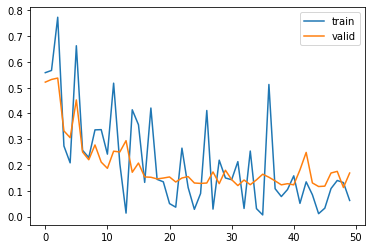

accuracy:


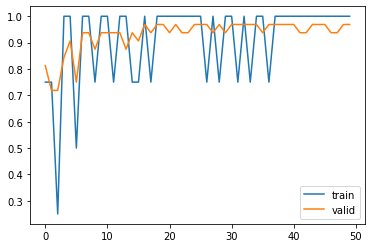

test loss: 0.0960
test accuracy: 0.9556


In [0]:
from sklearn.datasets import load_iris
from chainer.datasets import TupleDataset
from chainer.datasets import split_dataset_random
from chainer.iterators import SerialIterator
import chainer
import chainer.links as L
import chainer.functions as F
from chainer import optimizers
from chainer.optimizer_hooks import WeightDecay
import matplotlib.pyplot as plt
from chainer.serializers import save_npz

class Net(chainer.Chain):
  
  def __init__(self,n_in=4,n_hidden=3,n_out=3):
    super().__init__()
    with self.init_scope():
      self.l1=L.Linear(n_in,n_hidden)
      self.l2=L.Linear(n_hidden,n_hidden)
      self.l3=L.Linear(n_hidden,n_out)

  def forward(self,x):
    h=F.relu(self.l1(x))
    h=F.relu(self.l2(h))
    h=self.l3(h)

    return h

net=Net(n_hidden=100)

x,t=load_iris(return_X_y=True)
x=x.astype('float32')
t=t.astype('int32')

#入力値と目標値をタプルにして管理
dataset=TupleDataset(x,t)

#データを訓練用、検証用、テスト用に分割
train_val,test=split_dataset_random(dataset,int(len(dataset)*0.7),seed=0)
train,valid=split_dataset_random(train_val,int(len(train_val)*0.7),seed=0)

#ミニバッチイテレータを作成
train_iter=SerialIterator(train,batch_size=4,repeat=True,shuffle=True)

optimizer=optimizers.MomentumSGD(lr=0.001,momentum=0.9)
optimizer.setup(net)

#重み減衰をパラメータ更新の際にかける
for param in net.params():
  if param.name!='b':#バイアスは重み減衰させない
    param.update_rule.add_hook(WeightDecay(0.0001))#重み減衰をかける


gpu_id=0
n_batch=64
n_epoch=50

net.to_gpu(gpu_id)

#ログ出力用
results_train,results_valid={},{}
results_train['loss'],results_train['accuracy']=[],[]
results_valid['loss'],results_valid['accuracy']=[],[]

count=1

for epoch in range(n_epoch):
  while True:
    #ミニバッチの取得
    train_batch=train_iter.next()

    #x と tに分割
    #データをGPUに転送するために、concat_examplesにgpu_idを渡す
    x_train,t_train=chainer.dataset.concat_examples(train_batch,gpu_id)

    #予測値と目的関数の計算
    y_train=net(x_train)
    loss_train=F.softmax_cross_entropy(y_train,t_train)
    acc_train=F.accuracy(y_train,t_train)

    #勾配の初期化と勾配の計算
    net.cleargrads()
    loss_train.backward()

    #パラメータの更新
    optimizer.update()
    
    count+=1

    #1エポックごとにvalidデータで評価する
    if train_iter.is_new_epoch:
      #検証用データに対する結果の確認
      with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
        x_valid,t_valid=chainer.dataset.concat_examples(valid,gpu_id)
        y_valid=net(x_valid)
        loss_valid=F.softmax_cross_entropy(y_valid,t_valid)
        acc_valid=F.accuracy(y_valid,t_valid)

      #GPUで計算した結果をCPU上に転送する
      loss_train.to_cpu()
      loss_valid.to_cpu()
      acc_train.to_cpu()
      acc_valid.to_cpu()

      #結果の表示
      print("epoch: {}, iteration: {}, loss(train): {:.4f}, loss(valid): {:.4f},"
            "acc(train): {:.4f}, acc(valid): {:.4f}".format(
                epoch,count,loss_train.array.mean(),loss_valid.array.mean(),
                acc_train.array.mean(),acc_valid.array.mean()))

      #可視化用に保存
      results_train['loss'].append(loss_train.array)
      results_train['accuracy'].append(acc_train.array)
      results_valid['loss'].append(loss_valid.array)
      results_valid['accuracy'].append(acc_valid.array)

      break
  
  
print('\ncost function:')
plt.plot(results_train['loss'],label='train')
plt.plot(results_valid['loss'],label='valid')
plt.legend()
plt.show()

print('accuracy:')
plt.plot(results_train['accuracy'],label='train')
plt.plot(results_valid['accuracy'],label='valid')
plt.legend()
plt.show()

#テストデータに対する損失と制度を計算
x_test,t_test=chainer.dataset.concat_examples(test,device=gpu_id)
with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
  y_test=net(x_test)
  loss_test=F.softmax_cross_entropy(y_test,t_test)
  acc_test=F.accuracy(y_test,t_test)

print('test loss: {:.4f}'.format(loss_test.array.get()))
print('test accuracy: {:.4f}'.format(acc_test.array.get()))

net.to_cpu()
save_npz('net.npz',net)

In [0]:
import numpy as np

params=np.load('net.npz')

for key,param in params.items():
  print(key,':\t',param.shape)

print()
#パラメータの確認。
for key in params.files:
  print(key,':',params[key])

l3/W :	 (3, 100)
l3/b :	 (3,)
l1/W :	 (100, 4)
l1/b :	 (100,)
l2/W :	 (100, 100)
l2/b :	 (100,)

l3/W : [[-6.31055087e-02  2.01074138e-01 -2.43273582e-02  2.33093295e-02
   1.08240522e-01  1.83440018e-02 -3.61610621e-01 -1.68207094e-01
   1.36995718e-01  4.74717692e-02 -9.52894539e-02 -2.22831801e-01
  -8.56217556e-03  8.44672918e-02  5.45834675e-02 -1.49759755e-01
   4.99508381e-02 -5.20952456e-02 -7.52102584e-02 -5.31780673e-03
   1.15599997e-01 -8.20263848e-02  8.39916102e-05 -1.98298424e-01
  -1.92720816e-01 -7.72129372e-02  3.19815241e-02 -1.18210986e-01
  -7.36096641e-03 -4.71881963e-02 -2.60767788e-01 -7.92815164e-02
   1.31090984e-01 -1.93452254e-01 -2.44317781e-02 -1.47603288e-01
  -7.76027888e-02  1.41714245e-01 -1.53963149e-01  1.44166201e-01
  -1.27030283e-01 -4.44514956e-03 -1.07154056e-01  8.64530914e-04
   1.44483179e-01 -1.87873822e-02  3.97864431e-02  7.52491876e-03
  -4.43501920e-02 -5.95350936e-02  1.30282208e-01 -6.59716651e-02
  -9.66739431e-02  9.75422561e-02  1.6

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import chainer
import chainer.links as L
import chainer.functions as F
from sklearn.datasets import load_iris
from chainer.datasets import TupleDataset
from chainer.datasets import split_dataset_random
from chainer import iterators
from chainer import optimizers
from chainer import training
from chainer.training import extensions


#3層の多層パーセプトロンを構築する
class MLP(chainer.Chain):

  def __init__(self,n_mid_units=100,n_out=3):
    super().__init__()

    with self.init_scope():#各層の重み付けを登録
      self.fc1=L.Linear(None,n_mid_units)
      self.fc2=L.Linear(n_mid_units,n_mid_units)
      self.fc3=L.Linear(n_mid_units,n_out)
  
  def forward(self,x):
    h=F.relu(self.fc1(x))
    h=F.relu(self.fc2(h))
    return self.fc3(h)


#データセットの読み込み
dataset=load_iris()

x=dataset.data
t=dataset.target

#chainerが用いる型に変換
x=np.array(x,np.float32)
t=np.array(t,np.int32)

dataset=TupleDataset(x,t)

#データセットを訓練用、検証用、テスト用に分割
n_train=int(len(dataset)*0.7)
n_valid=int(len(dataset)*0.1)

train,valid_test=split_dataset_random(dataset,n_train,seed=0)
valid,test=split_dataset_random(valid_test,n_valid,seed=0)
"""
print("Training dataset size:",len(train))
print("Validation dataset size:",len(valid))
print("Test dataset size:",len(test))
"""

#イテレータの準備
batchsize=32

train_iter=iterators.SerialIterator(train,batchsize)
valid_iter=iterators.SerialIterator(valid,batchsize,shuffle=False,repeat=False)

#ネットワークを作成
predictor=MLP()

#L.Classsifierでラップし、損失の計算などをモデルに含める
net=L.Classifier(predictor)

#最適化手法を選択してオプティマイザを作成し、最適化対象のネットワークをもたせる
optimizer=optimizers.MomentumSGD(lr=0.1).setup(net)

#アップデータにイテレータとオプティマイザを渡す
#device=-1でCPUでの計算するように指定
updater=training.StandardUpdater(train_iter,optimizer,device=-1)

#トレーナの作成・終了タイミングの指定
trainer=training.Trainer(updater,(30,'epoch'),out='results/iris_result1')


#エクステンションの追加

#1エポック毎に損失の値や正解率をJSON形式で保存する
trainer.extend(extensions.LogReport(trigger=(1,'epoch'),log_name='log'))
#1エポック毎にトレーナオブジェクト(オプティマイザとネットワーク)を保存する
trainer.extend(extensions.snapshot(filename='snapshot_epoch-{.updater.epoch}'))
#損失の値をグラフ化できるようにDOT形式で保存する
trainer.extend(extensions.dump_graph('main/loss'))
#検証用データのイテレータと訓練中のネットワークオブジェクトを渡すことでネットワークの評価を行う
trainer.extend(extensions.Evaluator(valid_iter,net,device=-1),name='val')
#LogReportで集計した値を標準出力に出力する
trainer.extend(extensions.PrintReport(['epoch','iteration','main/loss','main/accuracy','val/main/loss','val/main/accuracy','fc1/W/data/mean','elapsed_time']))
#一層目の全結合層のパラメータの持つ勾配の平均値の変遷を描画したグラフを画像として保存
trainer.extend(extensions.PlotReport(['fc1/W/grad/mean'],x_key='epoch',file_name='mean.png'))
#訓練用データセットと検証用データセットのそれぞれで計算した損失の値の変遷を一つのグラフにまとめ、画像として保存
trainer.extend(extensions.PlotReport(['main/loss','val/main/loss'],x_key='epoch',file_name='loss.png'))
#訓練用データセットと検証用データセットのそれぞれで計算した正解率の値の変遷を一つのグラフにまとめ、画像として保存
trainer.extend(extensions.PlotReport(['main/accuracy','val/main/accuracy'],x_key='epoch',file_name='accuracy.png'))
#一層目の全結合層のパラメータの統計値を計算してレポートする。
#パラメータの局地最適への収束や発散していないかなどの検証に使用する
trainer.extend(extensions.ParameterStatistics(net.predictor.fc1,{'mean':np.mean},report_grads=True))


trainer.run()

epoch       iteration   main/loss   main/accuracy  val/main/loss  val/main/accuracy  fc1/W/data/mean  elapsed_time
1           4           9.70929     0.304688       0.99173        0.266667           -0.0509108       0.283913      
2           7           1.12285     0.447917       1.18337        0.666667           -0.133264        0.730366      
3           10          2.59652     0.427083       0.886345       0.6                -0.194033        1.09467       
4           14          0.762735    0.6875         0.700477       0.6                -0.252901        1.48855       
5           17          0.62029     0.645833       0.571054       0.6                -0.294354        1.84616       
6           20          0.464712    0.708333       0.69294        0.6                -0.319287        2.22453       
7           23          0.504276    0.677083       0.376787       0.933333           -0.337524        2.65207       
8           27          0.426091    0.796875       0.320722       

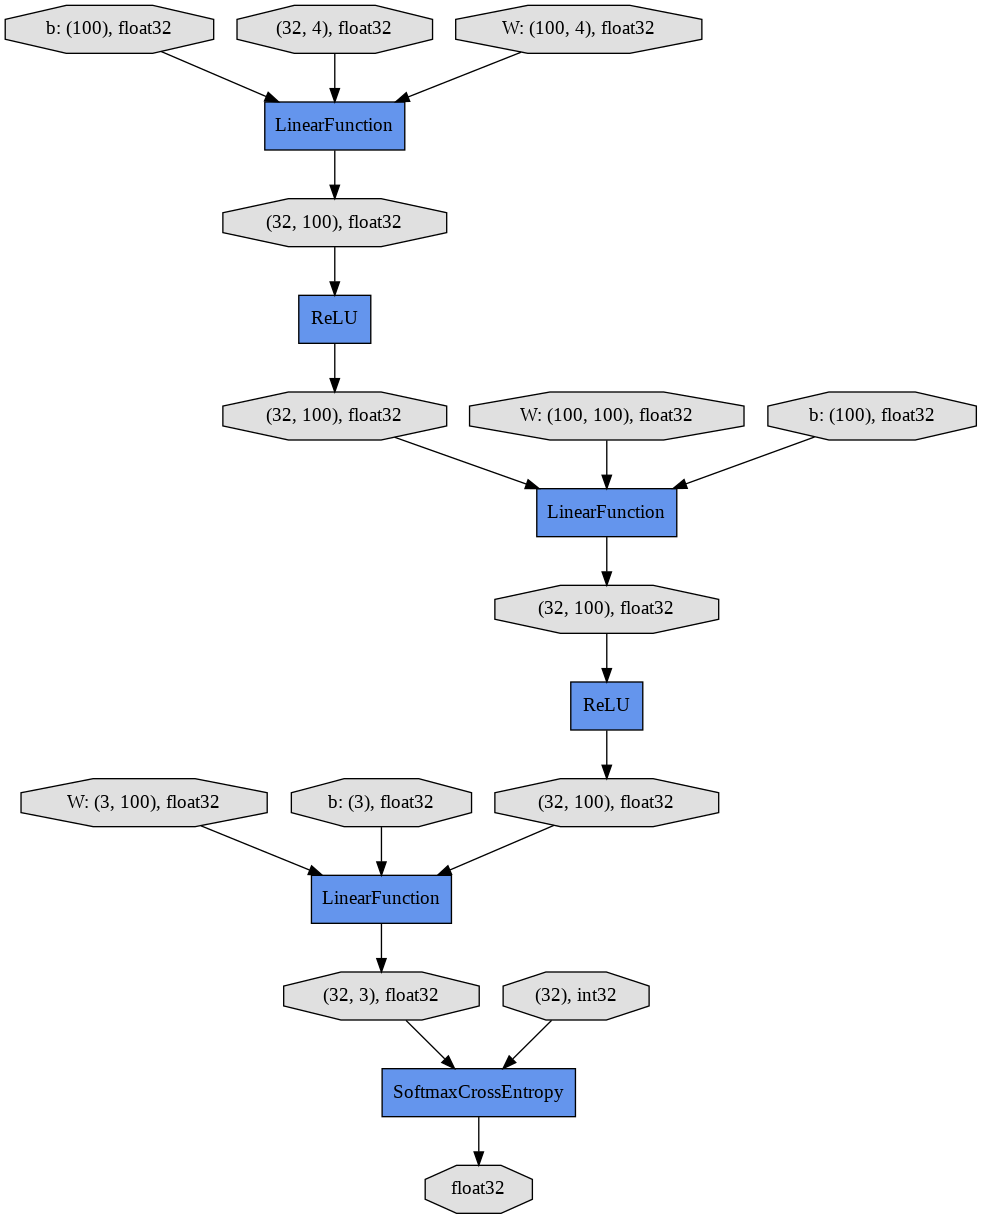

In [0]:
import json
import pandas as pd
from IPython.display import Image
import pydot

log=json.load(open('results/iris_result1/log'))
df_result=pd.DataFrame(log)

#df_result.tail(10)
#Image('results/iris_result1/loss.png')
#Image('results/iris_result1/accuracy.png')

file=pydot.graph_from_dot_file('results/iris_result1/cg.dot')
file[0].write_png('graph.png')
Image('graph.png',width=600,height=600)

In [5]:
from chainer import reporter
import chainer.links as L
import chainer.functions as F
import chainer
from sklearn.datasets import load_iris
from chainer.datasets import TupleDataset
from chainer.datasets import split_dataset_random
import numpy as np
from chainer.training import extensions


class MLP2(chainer.Chain):
  def __init__(self,n_mid_units=100,n_out=3):
    super().__init__()

    with self.init_scope():
      self.fc1=L.Linear(None,n_mid_units)
      self.fc2=L.Linear(n_mid_units,n_mid_units)
      self.fc3=L.Linear(n_mid_units,n_out)
    
  def forward(self,x):
    h=F.relu(self.fc1(x))
    h=F.relu(self.fc2(h))
    reporter.report({'avg_y':F.average(h),'var_y':F.cross_covariance(h,h)},self)
    return self.fc3(h)


net=L.Classifier(MLP2())

#データセットの読み込み
dataset=load_iris()

x=dataset.data
t=dataset.target

#chainerが用いる型に変換
x=np.array(x,np.float32)
t=np.array(t,np.int32)

dataset=TupleDataset(x,t)

#データセットを訓練用、検証用、テスト用に分割
n_train=int(len(dataset)*0.7)
n_valid=int(len(dataset)*0.1)

train,valid_test=split_dataset_random(dataset,n_train,seed=0)
valid,test=split_dataset_random(valid_test,n_valid,seed=0)


optimizer=chainer.optimizers.MomentumSGD(lr=0.1).setup(net)
train_iter=chainer.iterators.SerialIterator(train,32)
updater=chainer.training.StandardUpdater(train_iter,optimizer,device=-1)
trainer=chainer.training.Trainer(updater,(30,'epoch'))

trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport([
        'epoch','iteration',
        'main/accuracy',
        'main/predictor/avg_y',
        'main/predictor/var_y'
]))
trainer.run()

epoch       iteration   main/accuracy  main/predictor/avg_y  main/predictor/var_y
1           4           0.351562       1.44692               784.54                
2           7           0.552083       0.23986               95.5395               
3           10          0.666667       0.232723              130.741               
4           14          0.726562       0.266338              382.084               
5           17          0.6875         0.280666              802.467               
6           20          0.677083       0.199044              439.347               
7           23          0.5625         0.202037              72.6758               
8           27          0.65625        0.203884              498.438               
9           30          0.552083       0.21082               170.708               
10          33          0.541667       0.271273              1024.39               
11          37          0.578125       0.0709758             95.1052          

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import chainer
import chainer.links as L
import chainer.functions as F
from sklearn.datasets import load_iris
from chainer.datasets import TupleDataset
from chainer.datasets import split_dataset_random
from chainer import iterators
from chainer import optimizers
from chainer import training
from chainer.training import extensions
from chainer.training.triggers import EarlyStoppingTrigger

#3層の多層パーセプトロンを構築する
class MLP(chainer.Chain):

  def __init__(self,n_mid_units=100,n_out=3):
    super().__init__()

    with self.init_scope():#各層の重み付けを登録
      self.fc1=L.Linear(None,n_mid_units)
      self.fc2=L.Linear(n_mid_units,n_mid_units)
      self.fc3=L.Linear(n_mid_units,n_out)
  
  def forward(self,x):
    h=F.relu(self.fc1(x))
    h=F.relu(self.fc2(h))
    return self.fc3(h)


#データセットの読み込み
dataset=load_iris()

x=dataset.data
t=dataset.target

#chainerが用いる型に変換
x=np.array(x,np.float32)
t=np.array(t,np.int32)

dataset=TupleDataset(x,t)

#データセットを訓練用、検証用、テスト用に分割
n_train=int(len(dataset)*0.7)
n_valid=int(len(dataset)*0.1)

train,valid_test=split_dataset_random(dataset,n_train,seed=0)
valid,test=split_dataset_random(valid_test,n_valid,seed=0)
"""
print("Training dataset size:",len(train))
print("Validation dataset size:",len(valid))
print("Test dataset size:",len(test))
"""

#イテレータの準備
batchsize=32

net=L.Classifier(MLP())

train_iter=iterators.SerialIterator(train,batchsize)
valid_iter=iterators.SerialIterator(valid,batchsize,False,False)

optimizer=optimizers.MomentumSGD(lr=0.1).setup(net)
updater=training.StandardUpdater(train_iter,optimizer,device=-1)

trigger=EarlyStoppingTrigger(monitor='val/main/loss',check_trigger=(1,'epoch'),
                             patients=5,max_trigger=(30,'epoch'))
trainer=training.Trainer(updater,trigger,out='results/iris_result5')

trainer.extend(extensions.LogReport(trigger=(1,'epoch'),log_name='log'))
trainer.extend(extensions.Evaluator(valid_iter,net,device=-1),name='val')
trainer.extend(extensions.PlotReport(['main/loss','val/main/loss'],x_key='epoch',file_name='loss.png'))
trainer.extend(extensions.PlotReport(['main/accuracy','val/main/accuracy'],x_key='epoch',file_name='accuracy.png'))
trainer.extend(extensions.PrintReport([
        'epoch','main/loss','main/accuracy',
        'val/main/loss','val/main/accuracy','elapsed_time'
]))

trainer.run()

epoch       main/loss   main/accuracy  val/main/loss  val/main/accuracy  elapsed_time
1           2.58291     0.414062       0.981583       0.6                0.0189214     
2           0.87596     0.447917       0.641512       0.6                0.321979      
3           0.886831    0.614583       0.680185       0.666667           0.615218      
4           0.558459    0.6875         0.468866       0.933333           0.912106      
5           0.346774    0.9375         0.481273       0.666667           1.17772       
6           1.05928     0.677083       0.558668       0.666667           1.47072       
7           0.733665    0.625          0.72568        0.6                1.74483       
8           0.600041    0.6875         0.399487       0.933333           2.01841       
9           0.512126    0.833333       0.838451       0.6                2.29911       
10          0.61104     0.666667       0.254446       0.933333           2.58285       
11          0.239097    0.921875  

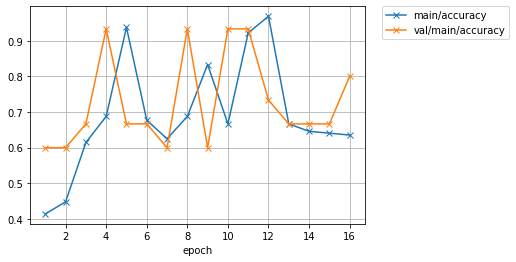

In [11]:
from IPython.display import Image
Image('results/iris_result5/loss.png')
Image('results/iris_result5/accuracy.png')